In [343]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv


In [344]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [345]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [346]:
# Gather basic information about the data
### YOUR CODE HERE ### 
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [347]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ### 
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [348]:
# Display all column names
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [349]:
# Rename columns as needed
### YOUR CODE HERE ### 
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [350]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [351]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [352]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [353]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


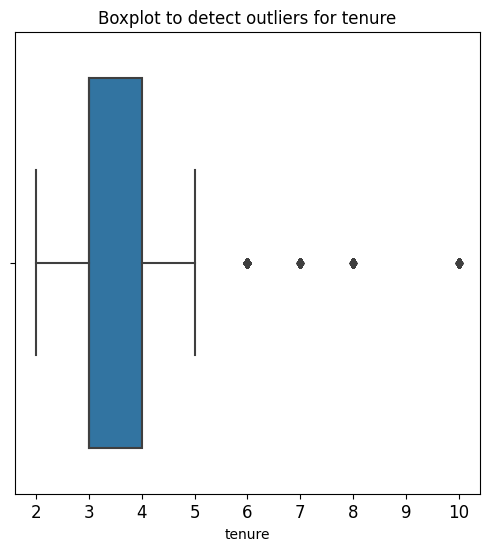

In [354]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [355]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [356]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


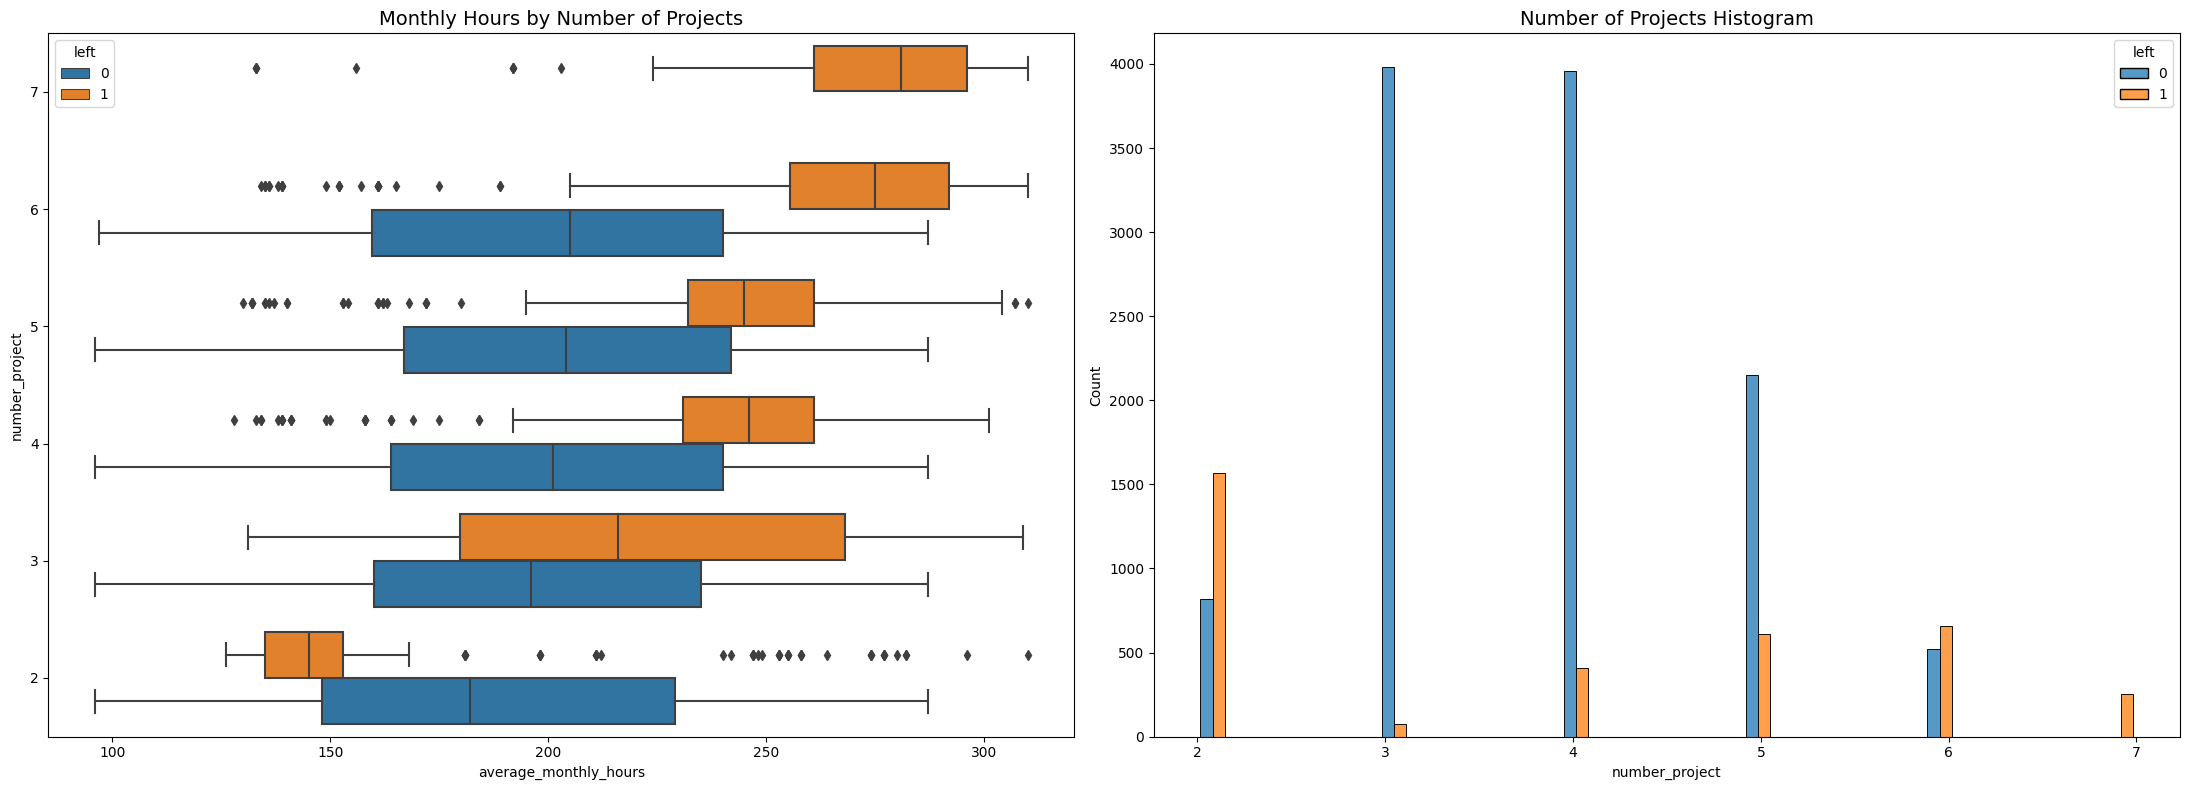

In [357]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
df = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Rename column to fix typo
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot
sns.boxplot(
    data=df,
    x='average_monthly_hours',
    y='number_project',
    hue='left',
    orient="h",
    ax=ax[0]
)
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects', fontsize=14)

# Histogram
sns.histplot(
    data=df,
    x='number_project',
    hue='left',
    multiple='dodge',
    shrink=0.8,
    ax=ax[1]
)
ax[1].set_title('Number of Projects Histogram', fontsize=14)

# Display plots
plt.tight_layout()
plt.show()


In [358]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

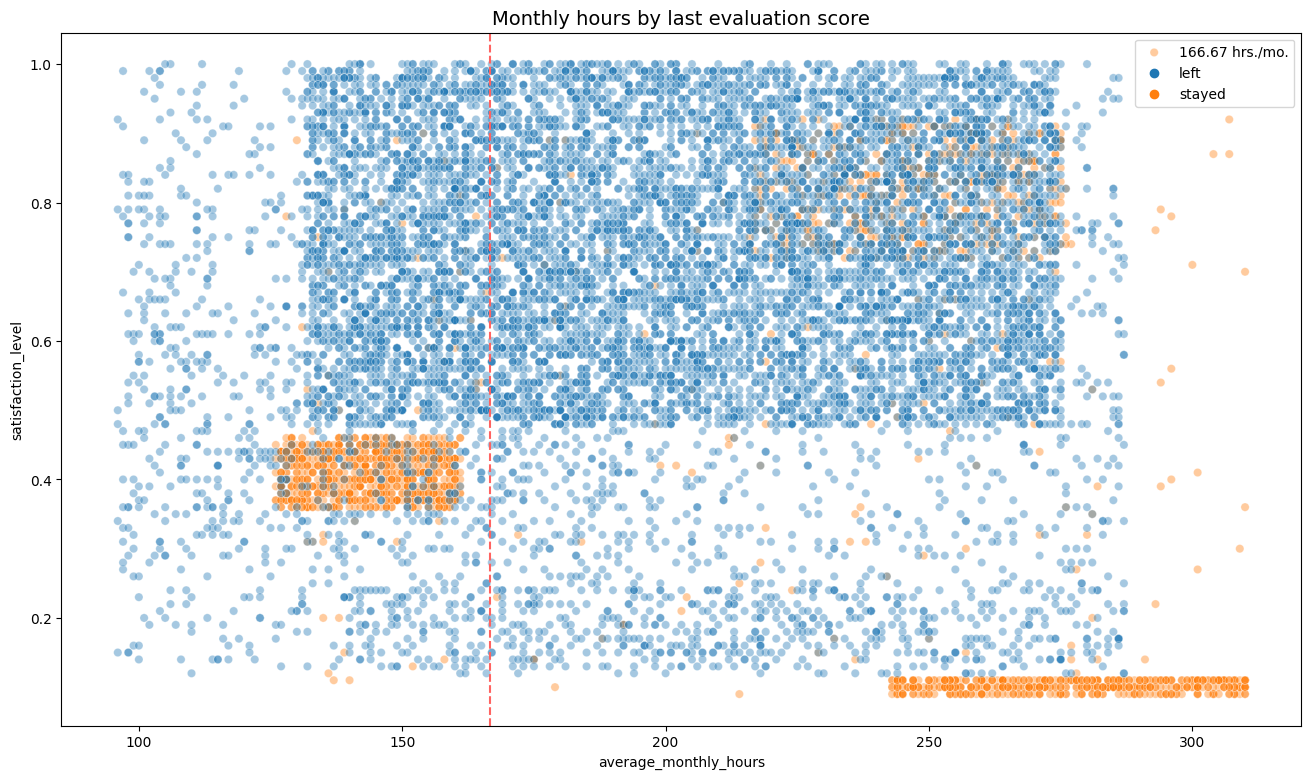

In [359]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

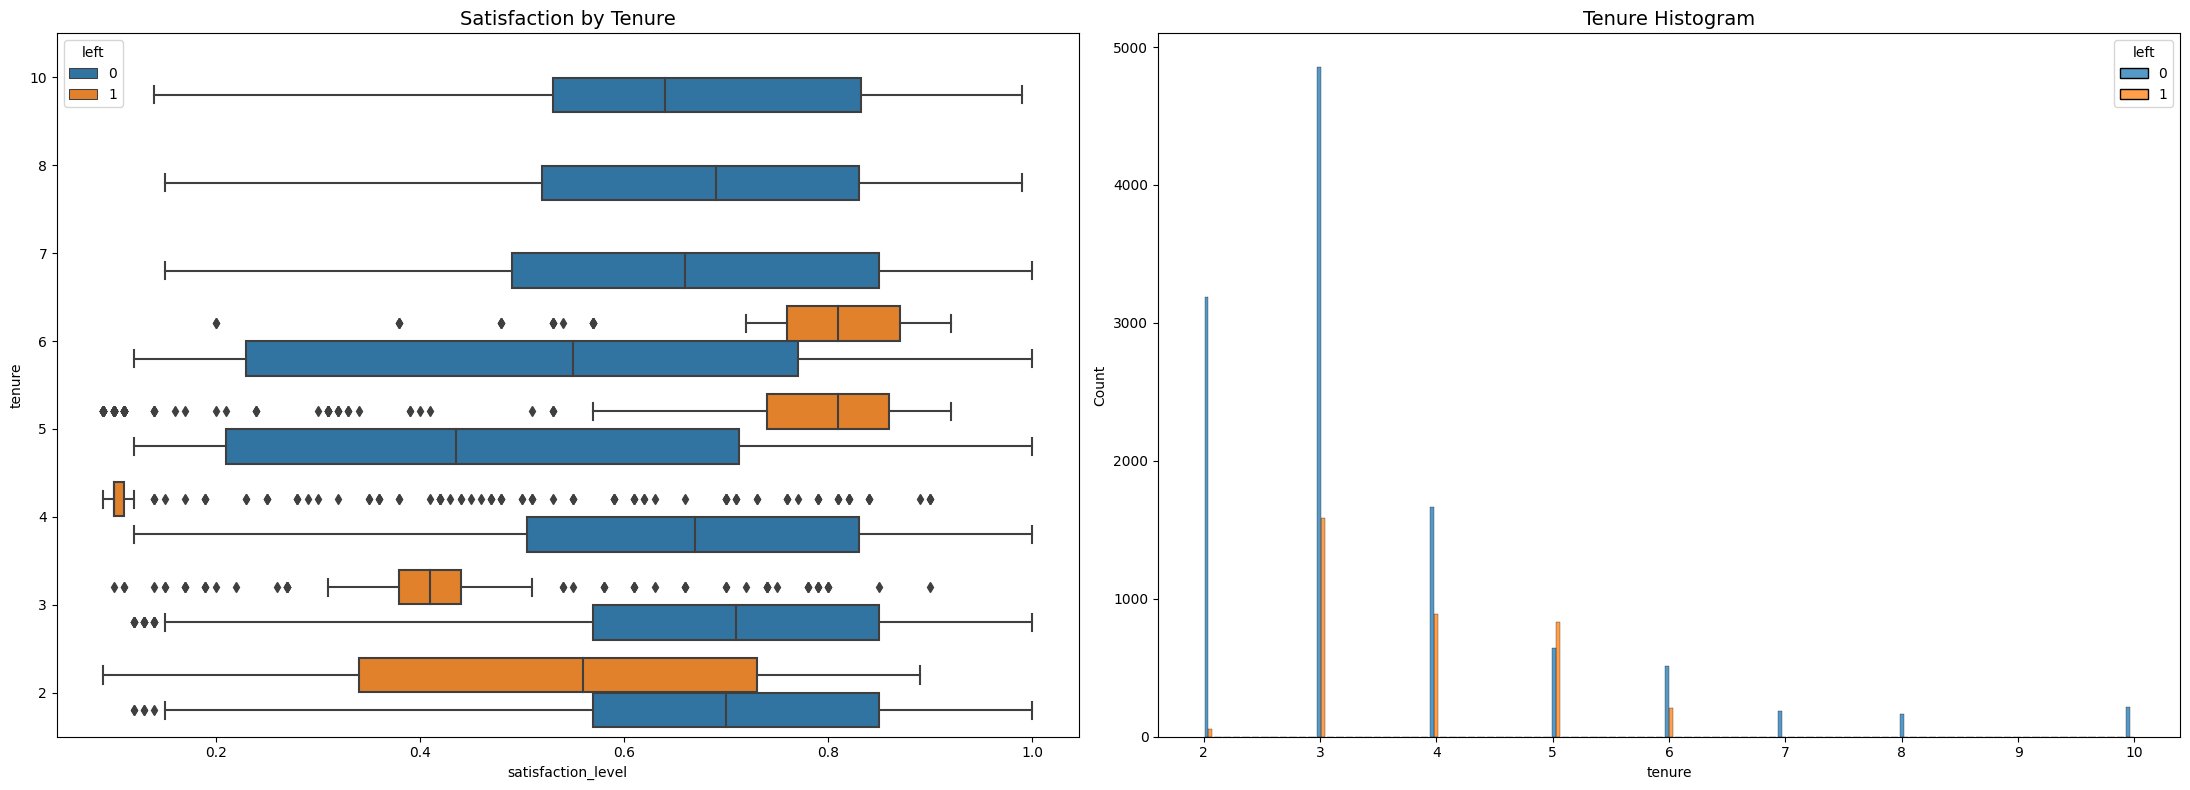

In [360]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Rename the column if needed (this ensures 'tenure' is mapped correctly)
df['tenure'] = df['time_spend_company']

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Boxplot: Satisfaction level by tenure, colored by whether employee left
sns.boxplot(
    data=df,
    x='satisfaction_level',
    y='tenure',
    hue='left',
    orient="h",
    ax=ax[0]
)
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize=14)

# Histogram: Tenure distribution by whether employee left
sns.histplot(
    data=df,
    x='tenure',
    hue='left',
    multiple='dodge',
    shrink=0.8,
    ax=ax[1]
)
ax[1].set_title('Tenure Histogram', fontsize=14)

# Show plots
plt.tight_layout()
plt.show()


In [361]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby('left')['satisfaction_level'].agg(['mean', 'median'])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


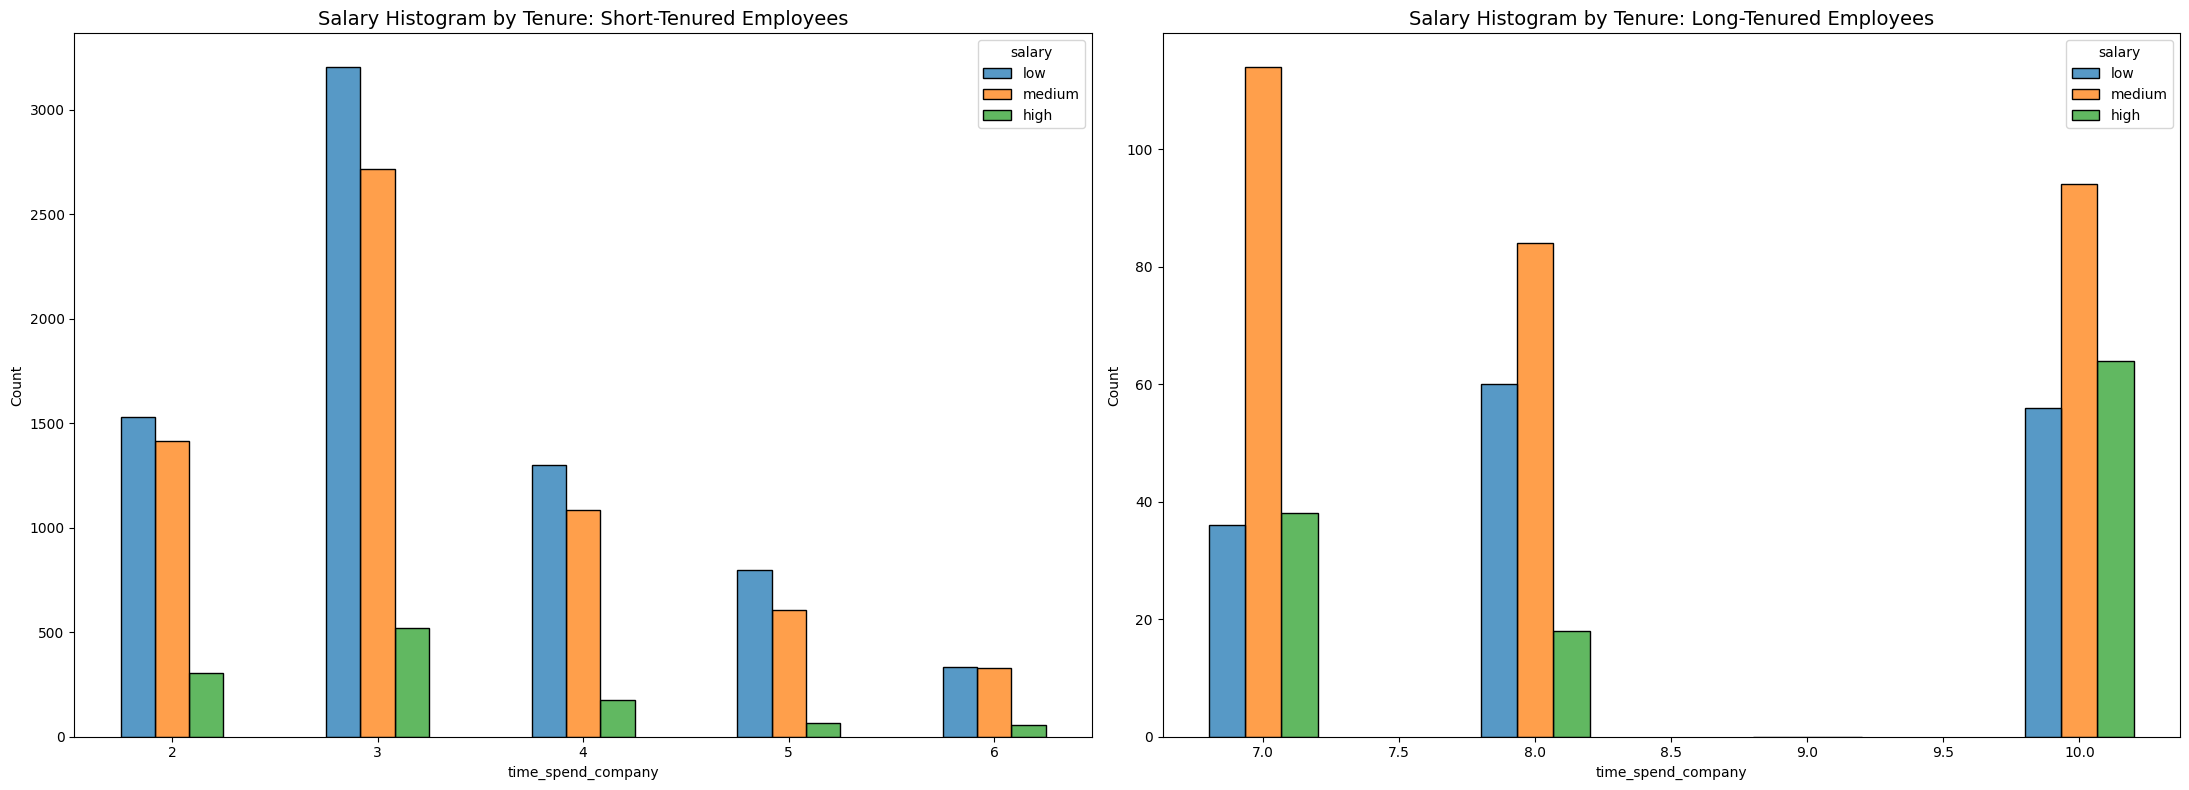

In [362]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured and long-tenured employees
tenure_short = df[df['time_spend_company'] < 7]
tenure_long = df[df['time_spend_company'] > 6]

# Plot short-tenured salary histogram
sns.histplot(
    data=tenure_short, x='time_spend_company', hue='salary',
    hue_order=['low', 'medium', 'high'], discrete=True,
    multiple='dodge', shrink=0.5, ax=ax[0]
)
ax[0].set_title('Salary Histogram by Tenure: Short-Tenured Employees', fontsize=14)

# Plot long-tenured salary histogram
sns.histplot(
    data=tenure_long, x='time_spend_company', hue='salary',
    hue_order=['low', 'medium', 'high'], discrete=True,
    multiple='dodge', shrink=0.4, ax=ax[1]
)
ax[1].set_title('Salary Histogram by Tenure: Long-Tenured Employees', fontsize=14)

plt.tight_layout()
plt.show()


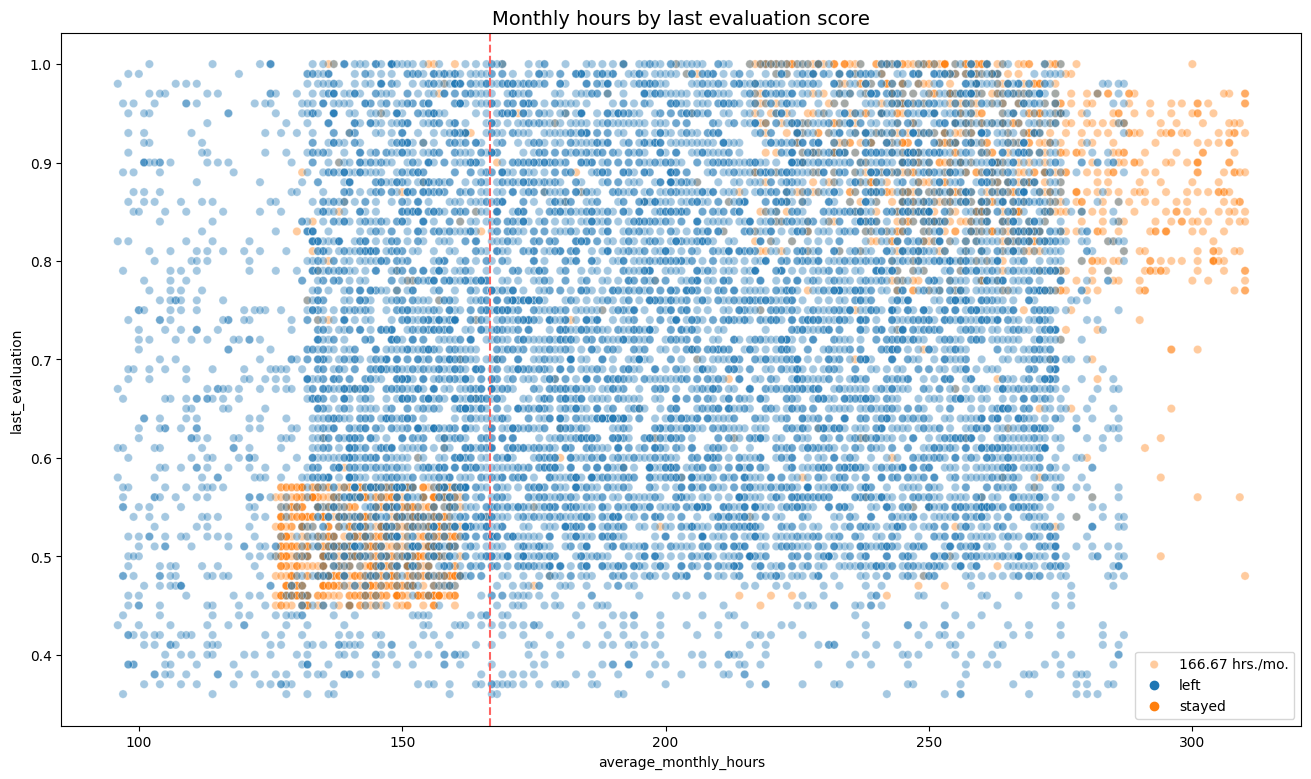

In [363]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

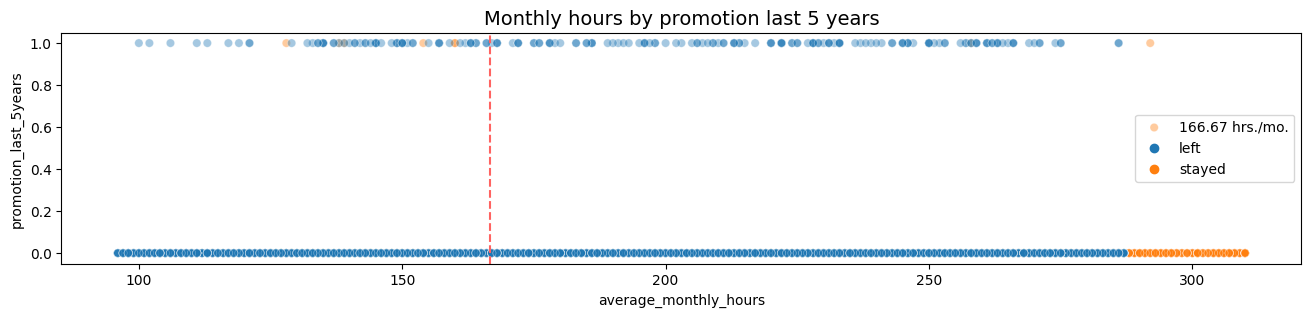

In [364]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [365]:
# Display counts for each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

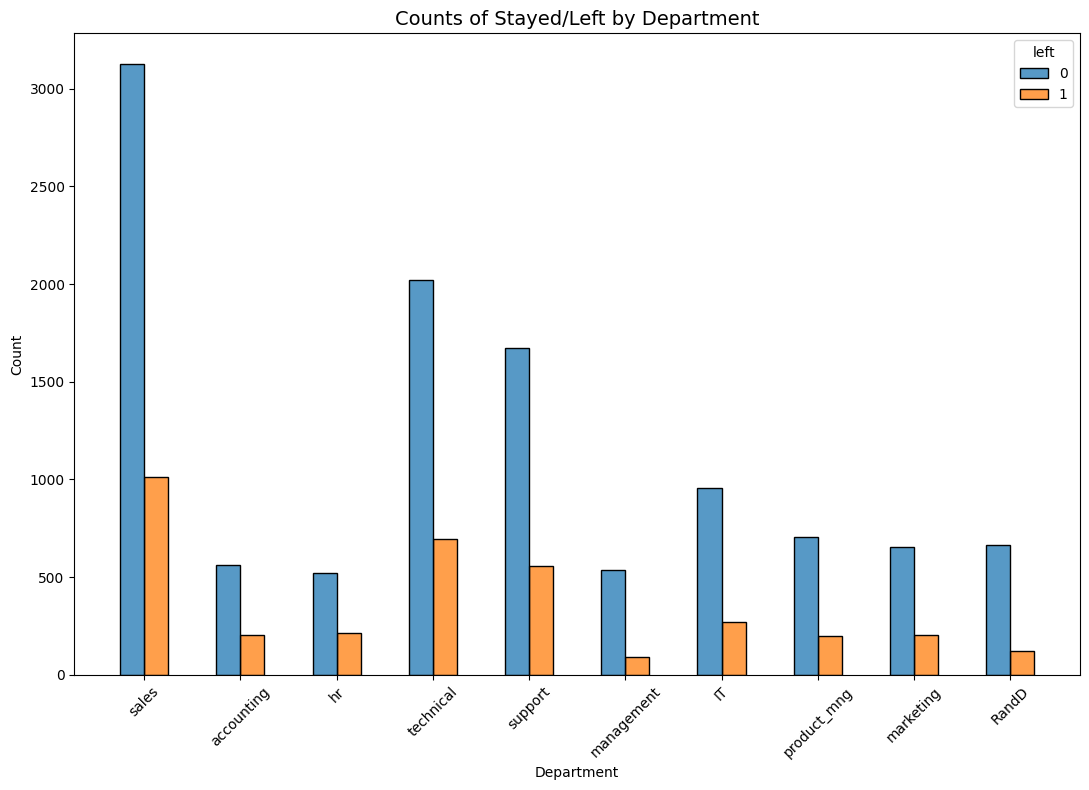

In [366]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create stacked histogram to compare department distribution of employees who left vs. stayed
plt.figure(figsize=(11, 8))
sns.histplot(
    data=df,
    x='Department',              # Make sure the column is named 'Department' (not lowercase 'department')
    hue='left',
    discrete=True,
    hue_order=[0, 1],
    multiple='dodge',
    shrink=0.5
)

plt.xticks(rotation=45)  # <-- FIX: 45 as a number, not string
plt.title('Counts of Stayed/Left by Department', fontsize=14)
plt.tight_layout()
plt.show()


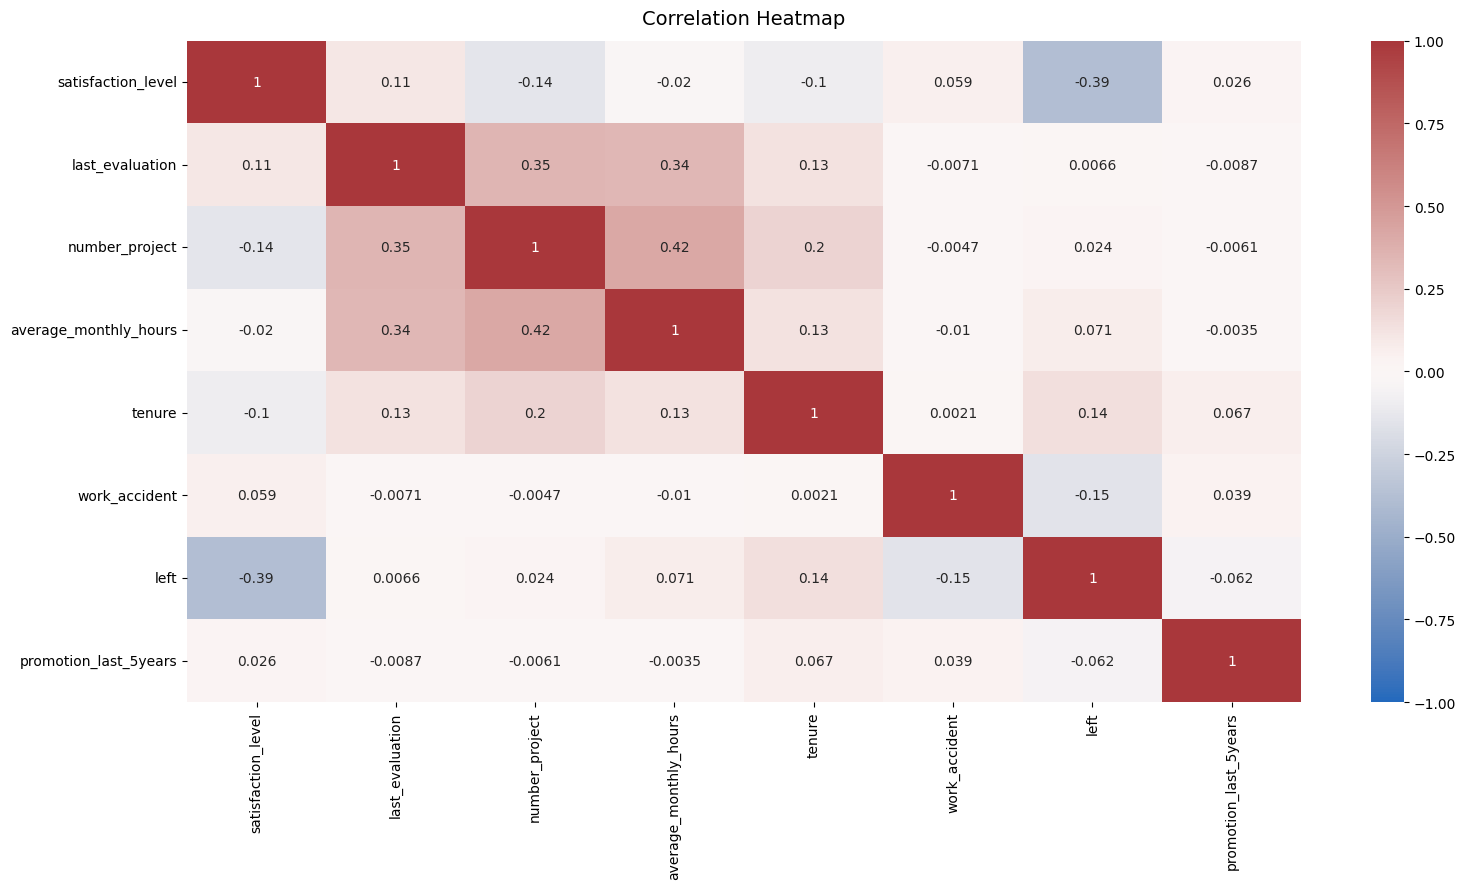

In [367]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot a correlation heatmap using only numeric columns
plt.figure(figsize=(16, 9))
numeric_df = df0.select_dtypes(include=['number'])  # keep only numeric columns
heatmap = sns.heatmap(
    numeric_df.corr(),
    vmin=-1, vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True)
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.tight_layout()
plt.show()


In [368]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


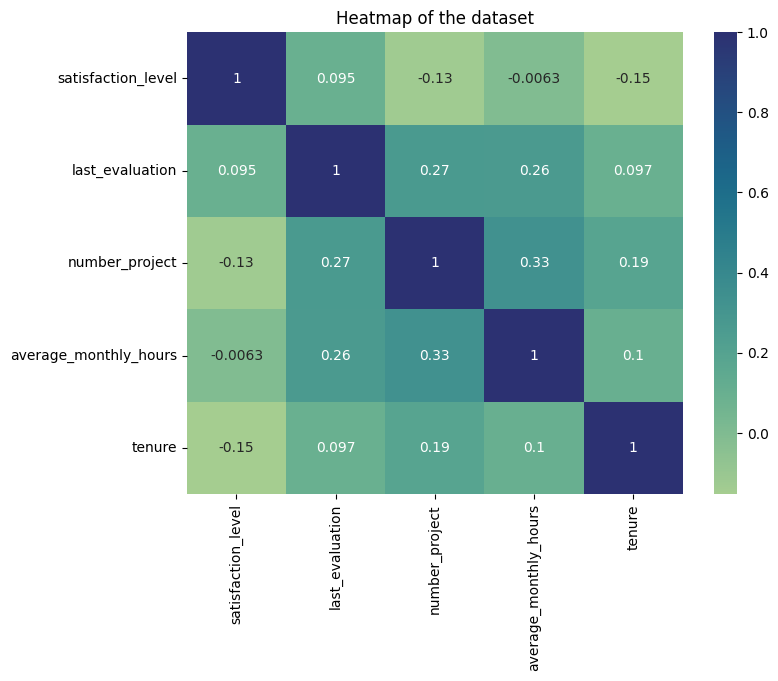

In [369]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

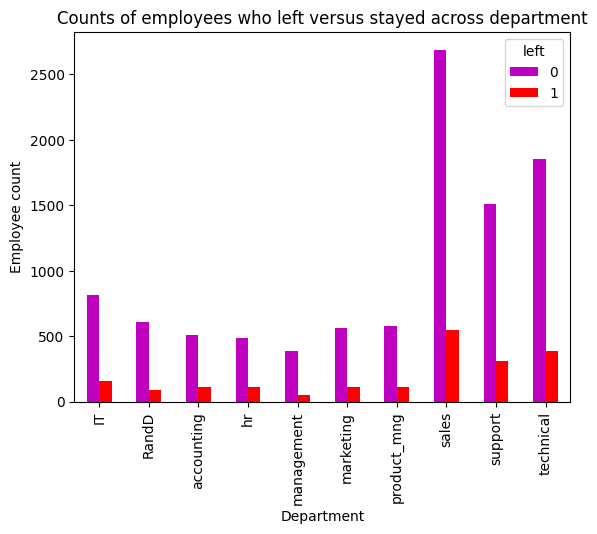

In [370]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [371]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [372]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [373]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [374]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [375]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [376]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

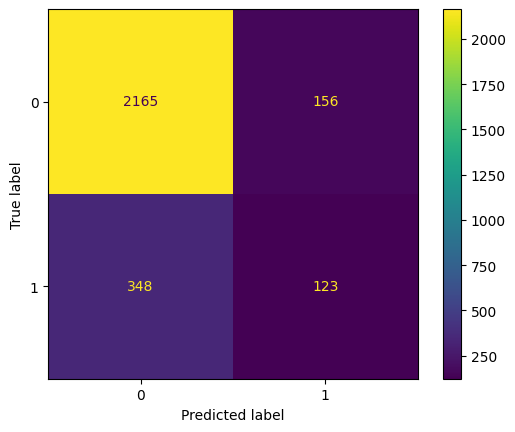

In [377]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [378]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [379]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [380]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [381]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [382]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [383]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [384]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.74 s, sys: 5.98 ms, total: 4.75 s
Wall time: 4.76 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'f1', 'roc_auc', 'recall'})

In [385]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [386]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

In [387]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [388]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


In [389]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [390]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [391]:
# Define a path to the folder where you want to save the model
path = '/kaggle/working/'

In [392]:
import pickle
import os

# Define the directory where the model will be saved
save_path = "/kaggle/working"
model_filename = "hr_rf1.pickle"

# Make sure the directory exists (optional in Kaggle, but good practice)
os.makedirs(save_path, exist_ok=True)

# Full path to save the model
full_model_path = os.path.join(save_path, model_filename)

# Save the trained model using pickle
with open(full_model_path, 'wb') as file:
    pickle.dump(rf1, file)

print(f"Model successfully saved to: {full_model_path}")


Model successfully saved to: /kaggle/working/hr_rf1.pickle


In [393]:
def read_pickle(path, saved_model_name: str):
    '''
    In: 
        path:             path to folder where you want to read from (e.g., '/kaggle/working/')
        saved_model_name: filename of pickled model you want to read in (without '.pickle')

    Out: 
        model: the loaded pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [394]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [395]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [396]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15]
}

rf = RandomForestClassifier(random_state=42)

# GridSearchCV setup
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit the grid
grid_rf.fit(X_train, y_train)

# ✅ Now this works:
print("Best AUC score from cross-validation:", grid_rf.best_score_)


Best AUC score from cross-validation: 0.9808475844163619


In [397]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15]
}

# Set up GridSearch
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',   # or 'roc_auc'
    cv=3,
    n_jobs=-1
)

# Fit the model
grid_rf.fit(X_train, y_train)

# Now this will work:
print(grid_rf.best_params_)
print(grid_rf.best_score_)


{'max_depth': 15, 'n_estimators': 100}
0.9824306924966625


In [400]:
import pandas as pd

def make_results(model_name, model_object, metric='auc'):
    """
    Summarize GridSearchCV results into a clean DataFrame.

    Args:
        model_name (str): Label for the model
        model_object (GridSearchCV): A fitted GridSearchCV object
        metric (str): Metric name used in scoring

    Returns:
        pd.DataFrame: Summary of best score and parameters
    """
    # Determine the correct metric column name
    if f'mean_test_{metric}' in model_object.cv_results_:
        metric_key = f'mean_test_{metric}'
        std_key = f'std_test_{metric}'
    elif 'mean_test_score' in model_object.cv_results_:
        metric_key = 'mean_test_score'
        std_key = 'std_test_score'
    else:
        raise KeyError(f"No matching column found for metric '{metric}'.")

    # Create DataFrame from GridSearchCV results
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Get the best score index and row
    best_index = model_object.best_index_
    best_row = cv_results.iloc[best_index]

    # Return the formatted summary row
    return p


In [401]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [404]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def get_scores(model_name, model, X_test_data, y_test_data):
    """
    Generate evaluation metrics on test data from a trained model (GridSearchCV or raw model).
    Returns a summary DataFrame.
    """
    # Use .best_estimator_ if GridSearchCV was used
    if hasattr(model, 'best_estimator_'):
        if not hasattr(model, 'refit_time_'):  # check if fitted
            raise ValueError(f"Model {model_name} has not been fit yet.")
        estimator = model.best_estimator_
    else:
        estimator = model

    preds = estimator.predict(X_test_data)
    probas = estimator.predict_proba(X_test_data)[:, 1] if hasattr(estimator, 'predict_proba') else preds

    return pd.DataFrame({
        'model': [model_name],
        'accuracy': [round(accuracy_score(y_test_data, preds), 4)],
        'precision': [round(precision_score(y_test_data, preds), 4)],
        'recall': [round(recall_score(y_test_data, preds), 4)],
        'f1_score': [round(f1_score(y_test_data, preds), 4)],
        'auc': [round(roc_auc_score(y_test_data, probas), 4)]
    })


In [405]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [406]:
# Define 'overworked' as employees working more than 175 hours/month
df2['overworked'] = (df2['average_monthly_hours'] > 175).astype(int)

# Display the new column
print(df2[['average_monthly_hours', 'overworked']].head())


   average_monthly_hours  overworked
0                    157           0
1                    262           1
2                    272           1
3                    223           1
4                    159           0


In [407]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [409]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [412]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [413]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [414]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.76 s, sys: 4.99 ms, total: 3.76 s
Wall time: 3.76 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'accuracy', 'f1', 'roc_auc', 'recall'})

In [415]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [416]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [419]:
import pandas as pd

def make_results(model_name, model_object, metric='auc'):
    """
    Summarize GridSearchCV results into a clean DataFrame.
    
    Args:
        model_name (str): A label for the model
        model_object (GridSearchCV): A trained GridSearchCV model
        metric (str): Metric name (e.g., 'auc', 'accuracy')
    
    Returns:
        pd.DataFrame
    """
    # Access the results
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Try both possible column names
    if f'mean_test_{metric}' in cv_results.columns:
        metric_key = f'mean_test_{metric}'
        std_key = f'std_test_{metric}'
    elif 'mean_test_score' in cv_results.columns:
        metric_key = 'mean_test_score'
        std_key = 'std_test_score'
    else:
        raise KeyError(f"No matching column found for metric '{metric}'.")

    best_index = model_object.best_index_
    best_row = cv_results.iloc[best_index]

    return pd.DataFrame({
        'model': [model_name],
        'score': [round(best_row[metric_key], 4)],
        'std': [round(best_row[std_key], 4)],
        'params': [model_object.best_params_]
    })
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define and fit the model first
tree2 = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={'max_depth': [3, 5, 10]},
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)
tree2.fit(X_train, y_train)

# Then call make_results AFTER fitting
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree2_cv_results)


               model   score     std            params
0  decision tree2 cv  0.9547  0.0008  {'max_depth': 5}


In [420]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [422]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define a minimal, test-friendly parameter grid
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [10, 20],               # Tree depth
    'min_samples_split': [2, 5]          # Split threshold
}

# Step 2: Create the GridSearchCV object with parallel processing
rf2 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',           # or 'accuracy'
    cv=3,                        # 3-fold CV to reduce runtime
    n_jobs=-1,                   # Use all CPU cores
    verbose=2                    # Show progress
)

# Step 3: Fit the model (this is the slow part if grid is too large)
rf2.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [425]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [426]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [427]:
# Check best params
rf2.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [428]:
# Check best AUC score on CV
rf2.best_score_

0.9692324460821151

In [429]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model   score     std            params
0  decision tree2 cv  0.9547  0.0008  {'max_depth': 5}
               model   score     std  \
0  random forest2 cv  0.9692  0.0008   

                                              params  
0  {'max_depth': 10, 'min_samples_split': 2, 'n_e...  


In [430]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,accuracy,precision,recall,f1_score,auc
0,random forest2 test,0.9666,0.9095,0.8876,0.8984,0.9713


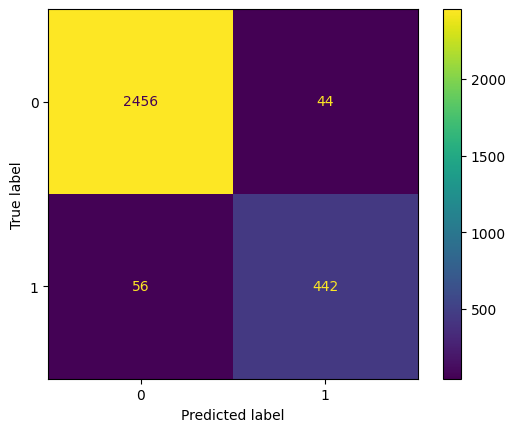

In [431]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

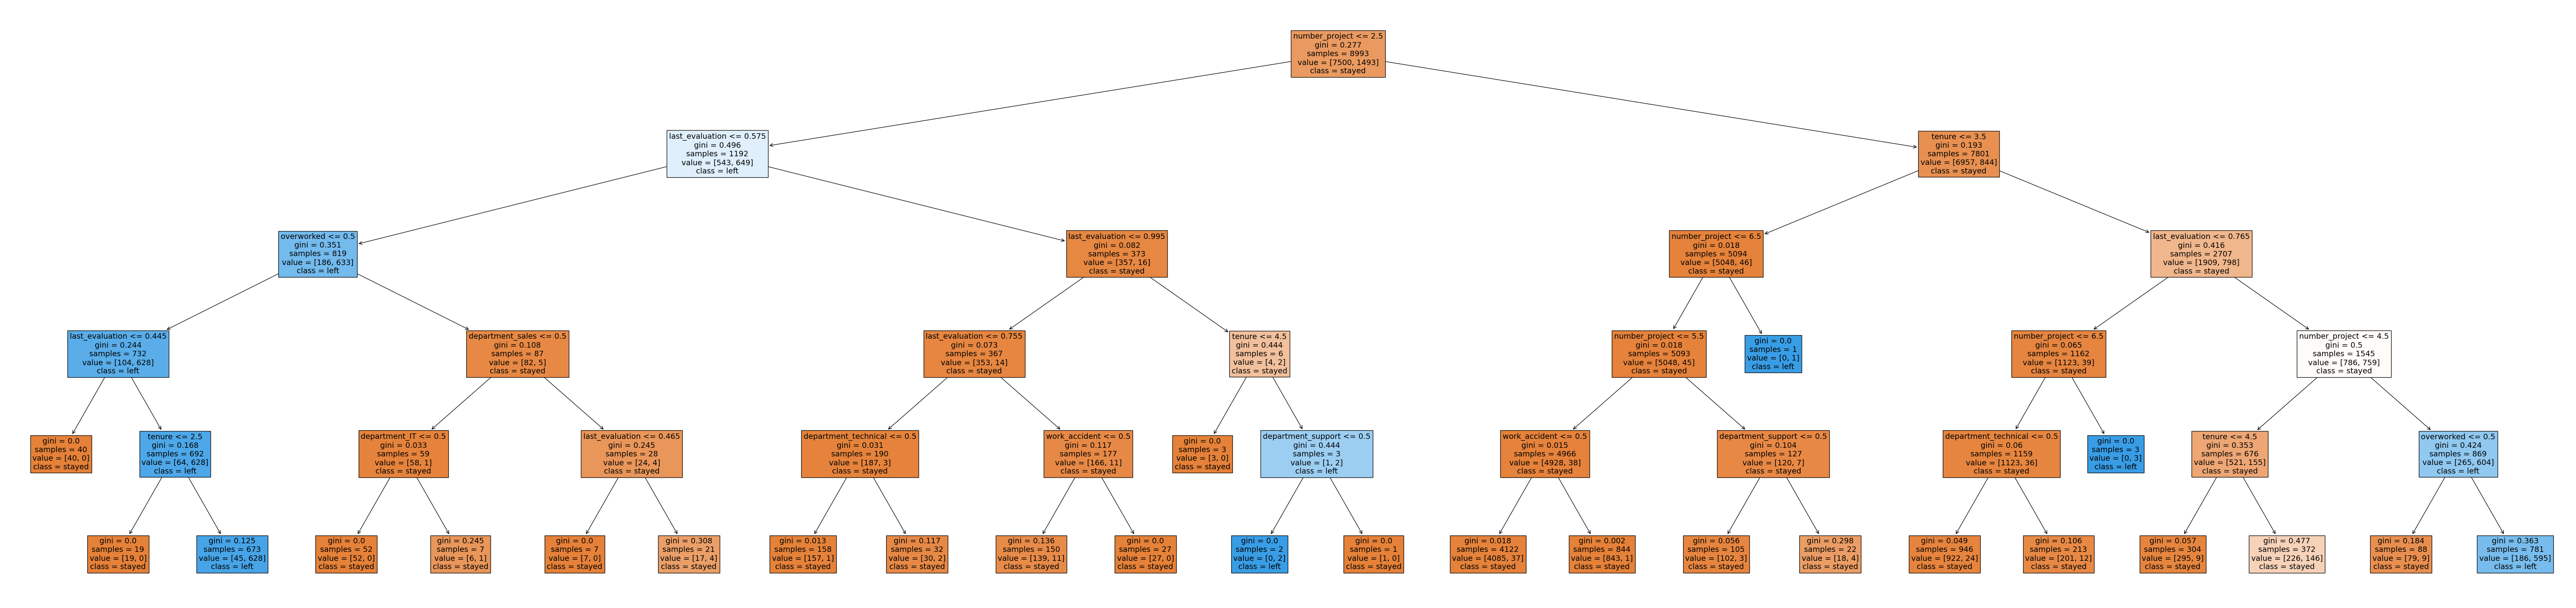

In [432]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [433]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.357532
number_project,0.329409
tenure,0.212891
overworked,0.097916
department_support,0.001272
department_sales,0.000350
department_technical,0.000291
work_accident,0.000192
department_IT,0.000146


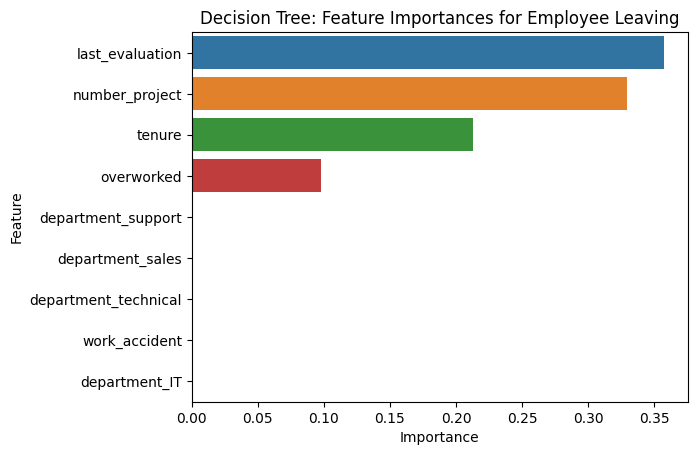

In [434]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

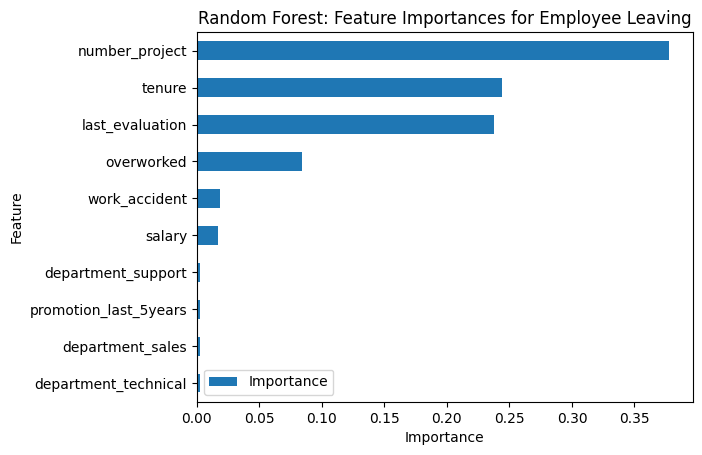

[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_s

In [435]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()